In [26]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='1990-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-23,20.420000,20.889999,19.530001,20.150000,20.150000,0.0
2021-05-24,20.500000,20.510000,18.379999,18.400000,18.400000,0.0
2021-05-25,18.350000,19.290001,16.870001,18.840000,18.840000,0.0
2021-05-26,18.370001,18.920000,17.350000,17.360001,17.360001,0.0
2021-05-27,0.000000,0.000000,0.000000,16.740000,16.740000,0.0


In [28]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='1990-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-23,4168.609863,4188.720215,4151.720215,4155.859863,4155.859863,3.344620e+09
2021-05-24,4170.160156,4209.520020,4170.160156,4197.049805,4197.049805,2.947400e+09
2021-05-25,4205.939941,4213.419922,4182.520020,4188.129883,4188.129883,3.420870e+09
2021-05-26,4191.589844,4202.609863,4184.109863,4195.990234,4195.990234,3.674490e+09
2021-05-27,4201.939941,4213.379883,4197.779785,4200.879883,4200.879883,3.394898e+09


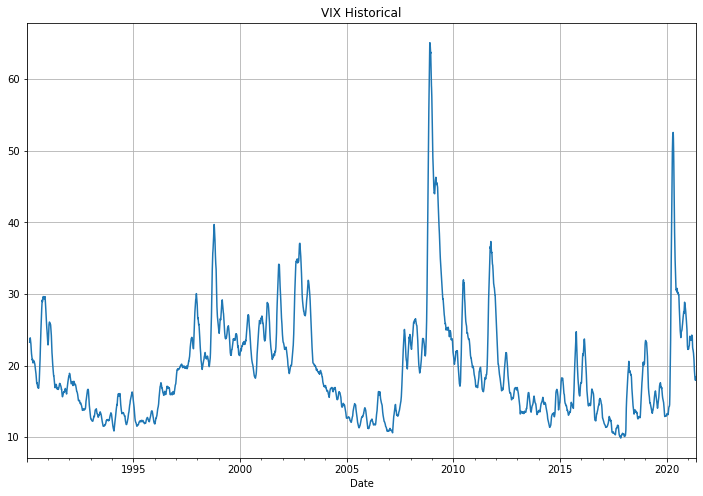

In [29]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

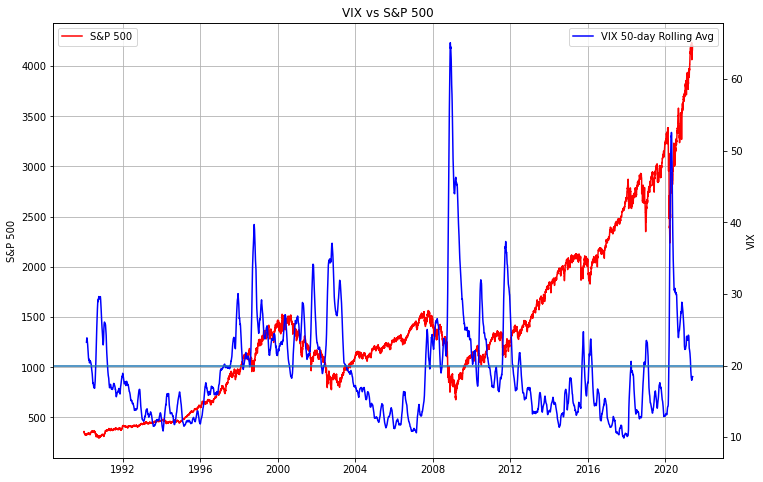

In [30]:
#Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected)which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)